<a href="https://colab.research.google.com/github/mmsamiei/lets-pytorch/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

num_data = 6400
x = np.random.uniform(low =-1, high=1, size=num_data)
x = np.concatenate((x,x))
y = np.zeros_like(x)
for i in range(len(y)):
  noise = np.random.randn()*0.05
  y[i] = np.sqrt(1-x[i]**2) + noise
  r = np.random.uniform()
  if r < 0.5:
    y[i] = -1 * y[i]

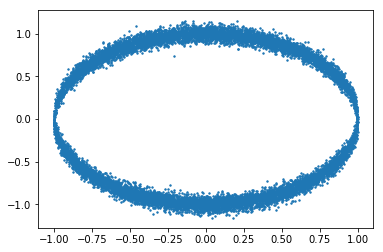

In [377]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s = 2)
plt.show()

# **define model**

In [0]:
from torch import nn

class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 8)
        self.fc3 = nn.Linear(8, 16)
        self.fc4 = nn.Linear(16, 32)
        self.drop = nn.Dropout(p=0.5)
        self.fc5 = nn.Linear(32, 1)
        self.fc6 = nn.Linear(1, 32)
        self.fc7 = nn.Linear(32, 16)
        self.fc8 = nn.Linear(16, 8)
        self.fc9 = nn.Linear(8, 4)
        self.fc10 = nn.Linear(4, 2)
        
        
        self.tanh = nn.Tanh()

    def forward(self, xb):
        temp = xb
        temp = self.tanh(self.fc1(temp))
        temp = self.tanh(self.fc2(temp))
        temp = self.tanh(self.fc3(temp))
        temp = self.drop(temp)
        temp = self.tanh(self.fc4(temp))
        temp = self.drop(temp)
        temp = self.tanh(self.fc5(temp))
        temp = self.tanh(self.fc6(temp))
        temp = self.tanh(self.fc7(temp))
        temp = self.tanh(self.fc8(temp))
        temp = self.tanh(self.fc9(temp))
        temp = self.tanh(self.fc10(temp))
        return temp
    
    def decode(self, z):
        temp = z
        temp = self.tanh(self.fc6(temp))
        temp = self.tanh(self.fc7(temp))
        temp = self.tanh(self.fc8(temp))
        temp = self.tanh(self.fc9(temp))
        temp = self.tanh(self.fc10(temp))
        return temp
        

# **dataLoading**

In [379]:
X = np.stack((x,y),axis = 1)
X.shape

(12800, 2)

In [0]:
X = torch.tensor(X)


In [0]:
from torch.utils.data import DataLoader, TensorDataset

train_dl = DataLoader(X, batch_size=64)

# **now operate ...**

In [0]:
import torch
model = AutoEncoder()
opt = torch.optim.Adam(model.parameters())

In [383]:
# now lets test model
test = torch.randn(1,2)
model(test)

tensor([[-0.3408, -0.4693]], grad_fn=<TanhBackward>)

In [384]:
loss_arr = []
for epoch in range(100):
  for xb in train_dl:
    xb = xb.float()
    out = model(xb)
    loss = nn.functional.mse_loss(out, xb)
    loss.backward()
    opt.step()
    opt.zero_grad()
    loss_arr.append(loss.item())
  if(epoch%10 == 0):
    print("EPOCH ", epoch, " loss is : ", loss.item())

EPOCH  0  loss is :  0.17302291095256805
EPOCH  10  loss is :  0.06239068880677223
EPOCH  20  loss is :  0.06664550304412842
EPOCH  30  loss is :  0.048147764056921005
EPOCH  40  loss is :  0.05251837521791458
EPOCH  50  loss is :  0.050546903163194656
EPOCH  60  loss is :  0.039538703858852386
EPOCH  70  loss is :  0.040469225496053696
EPOCH  80  loss is :  0.04377551004290581
EPOCH  90  loss is :  0.030080916360020638


In [385]:
#now lets test the model decoder
test = torch.randn(2,1)
model.decode(test)

tensor([[-0.3045,  0.8885],
        [-0.5427,  0.7994]], grad_fn=<TanhBackward>)

In [386]:
with torch.no_grad():
  z = np.random.uniform(-1,1, size = (1000,1))
  X = model.decode(torch.tensor(z).float()).numpy()
  print(X.shape)

(1000, 2)


In [0]:
x_generated = X[:,0]
y_generated = X[:,1]

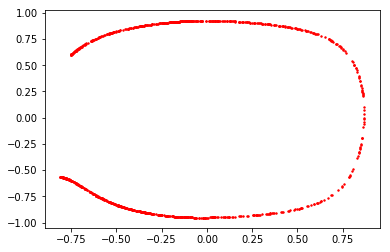

In [388]:
import matplotlib.pyplot as plt
plt.scatter(x_generated, y_generated, s = 2, c='red')
plt.show()